In [5]:
# !pip3 install tables

    100% |████████████████████████████████| 4.6MB 282kB/s 
  Using cached https://files.pythonhosted.org/packages/52/e6/1715e592ef47f28f3f50065322423bb75619ed2f7c24be86380ecc93503c/numpy-1.18.1-cp35-cp35m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 163kB 7.2MB/s 
  Running setup.py bdist_wheel for tables ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/3a/a6/49/e6cb0ce92e7285472e373323b27499a10cffe247f380bf5b6e
Successfully built tables


## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, precision_score, recall_score

from scipy.ndimage.interpolation import shift

In [2]:
pd.options.display.max_columns = 999

## Data Read and Analysis

In [3]:
mnist_train = pd.read_csv('gs://ascn_store_traffic_forecasting/pipeline/tmp_data/mnist/train.csv')
mnist_test = pd.read_csv('gs://ascn_store_traffic_forecasting/pipeline/tmp_data/mnist/test.csv')

In [4]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [5]:
mnist_train.shape, mnist_test.shape

((42000, 785), (28000, 784))

In [6]:
mnist_train.isnull().values.any(), mnist_test.isnull().values.any()

(False, False)

In [7]:
mnist_train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

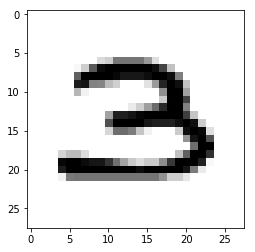

In [8]:
# taking only one random sample from test-set to gauge the workings of

any_digit = mnist_test.iloc[519]
any_digit_image = any_digit.values.reshape(28,28)

plt.imshow(any_digit_image, cmap = 'binary')
plt.axis("on")
plt.show()

## Splitting train data into training and test set

In [9]:
X = mnist_train.drop('label', axis=1)
y = mnist_train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

## Classifier

### Random Forest Classifier

In [ ]:
forest_clf = RandomForestClassifier(random_state = 123)
forest_clf.fit(X_train, y_train)

In [ ]:
forest_clf.predict([any_digit])

In [ ]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.imshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0) # filling diagonals with 0 to gauge the actual errors
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

* a lot of actual 5s are understood as 3
* same is the issue with 9, mistaken as 4

In [ ]:
param_grid_forest = {
    'n_estimators':[100, 200, 500]
    , 'max_features':['auto', 'sqrt', 'log2']
}

cv_rfc = GridSearchCV(estimator = forest_clf
                      , param_grid = param_grid_forest
                      , cv = 3
                      , n_jobs = -1)

cv_rfc.fit(X_train, y_train)

print(cv_rfc.best_params_)

In [ ]:
bst_forest_clf = cv_rfc.best_estimator_

In [ ]:
bst_forest_clf

In [ ]:
cross_val_score(bst_forest_clf
                , X_train
                , y_train
                , cv = 3
                , scoring="accuracy"
                , n_jobs = -1)

### K nearest neighbors

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

In [ ]:
knn_clf.predict([any_digit])

In [ ]:
# Default KNN Classifier

cross_val_score(knn_clf
                , X_train
                , y_train
                , cv=3
                , scoring="accuracy"
                , n_jobs = -1)

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 4, 5, 10, 20, 30]
    , 'weights': ['uniform', 'distance']
}

In [ ]:
cv_knn = GridSearchCV(estimator=knn_clf
                      , param_grid = param_grid_knn
                      , cv=3
                      , n_jobs = -1
                      , verbose = 3)

cv_knn.fit(X_train, y_train)

print(cv_knn.best_params_)

In [ ]:
bst_knn_classifier = cv_knn.best_estimator_
bst_knn_classifier

In [ ]:
cross_val_score(bst_knn_classifier
                , X_train
                , y_train
                , cv=3
                , scoring='accuracy'
                , n_jobs=-1)

### Creating a model using both RandomForest and KNN and checking the results on test set kept aside from the train set

#### KNN performance

In [ ]:
optimal_knn_classifier = KNeighborsClassifier(algorithm='auto'
                                              , leaf_size=30
                                              , metric='minkowski'
                                              , metric_params=None
                                              , n_jobs=-1
                                              , n_neighbors=4
                                              , p=2
                                              , weights='distance')

In [ ]:
optimal_knn_classifier.fit(X_train, y_train)

In [ ]:
y_test_pred = optimal_knn_classifier.predict(X_test)

In [ ]:
pred = optimal_knn_classifier.predict_proba(X_test)

In [ ]:
knn_conf_mx = confusion_matrix(y_test, y_test_pred)
knn_conf_mx

In [ ]:
log_loss(y_test, pred)

In [ ]:
accuracy_score(y_test, y_test_pred)

In [ ]:
precision_score(y_test, y_test_pred, average = 'weighted')

In [ ]:
precision_score(y_test, y_test_pred, average = 'macro')

In [ ]:
recall_score(y_test, y_test_pred, average = 'weighted')

In [ ]:
recall_score(y_test, y_test_pred, average = 'macro')

#### RandomForest performance

In [ ]:
optimal_forest_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini'
                                            , max_depth=None, max_features='auto', max_leaf_nodes=None
                                            , min_impurity_decrease=0.0, min_impurity_split=None
                                            , min_samples_leaf=1, min_samples_split=2
                                            , min_weight_fraction_leaf=0.0, n_estimators=500
                                            , n_jobs=-1, oob_score=False, random_state=123
                                            , verbose=0, warm_start=False)

optimal_forest_clf.fit(X_train, y_train)

In [ ]:
y_test_forest_pred = optimal_forest_clf.predict(X_test)

In [ ]:
forest_pred_proba = optimal_forest_clf.predict_proba(X_test)

In [ ]:
forest_conf_mx = confusion_matrix(y_test, y_test_forest_pred)
forest_conf_mx

In [ ]:
log_loss(y_test, forest_pred_proba)

In [ ]:
accuracy_score(y_test, y_test_forest_pred)

In [ ]:
precision_score(y_test, y_test_forest_pred, average = 'weighted')

In [ ]:
recall_score(y_test, y_test_forest_pred, average = 'weighted')

##### as knn's log loss is better, continuing with KNN

### Training on the entire Kaggle train data and creating the submission

In [ ]:
optimal_knn_classifier = KNeighborsClassifier(algorithm='auto'
                                              , leaf_size=30
                                              , metric='minkowski'
                                              , metric_params=None
                                              , n_jobs=-1
                                              , n_neighbors=4
                                              , p=2
                                              , weights='distance')

optimal_knn_classifier.fit(X, y)

In [ ]:
mnist_test_pred = optimal_knn_classifier.predict(mnist_test)

In [ ]:
mnist_test_pred.shape

In [ ]:
mnist_first_submission = pd.DataFrame({"ImageId": range(1, len(mnist_test_pred)+1)
                                      , "Label": mnist_test_pred})

In [ ]:
mnist_first_submission.tail(10)

In [ ]:
mnist_first_submission.to_csv('mnist_submission.csv', index=False)

## Data Augmentation: Creating more samples of same images within train data to increase the size of samples

In [9]:
def shift_image_direction(image_sample, yaxis, xaxis):
    
    image_sample_res = image_sample.values.reshape(28,28)
    
    shifted_image = shift(input = image_sample_res
                          , shift = [yaxis, xaxis]
                          , cval=0
                          , mode = 'constant')
    
    return shifted_image.reshape([-1])

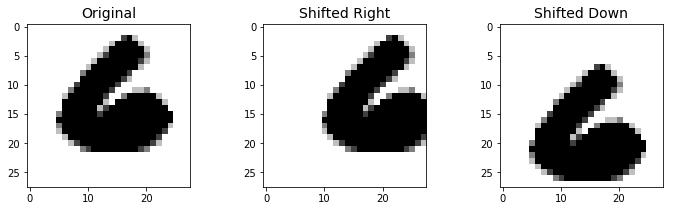

In [10]:
image_sample = mnist_train.drop('label', axis=1).iloc[500]
shifted_image_right = shift_image_direction(image_sample, yaxis=0, xaxis=5)
shifted_image_down = shift_image_direction(image_sample, yaxis=5, xaxis=0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image_sample.values.reshape(28,28), cmap = 'binary')
plt.subplot(132)
plt.title("Shifted Right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28,28), cmap='binary')
plt.subplot(133)
plt.title("Shifted Down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28,28), cmap='binary')
plt.axis("on")
plt.show()

In [27]:
mnist_X_train_list = []
mnist_y_train_list = []

#### either run this

In [28]:
# for row in range(len(mnist_train)):
#     for yaxis, xaxis in ((1,0), (-1,0), (0,1), (0, -1)):
#         image = mnist_train.drop('label', axis=1).iloc[row]
#         label = mnist_train.label[row]
#         mnist_X_train_list.append(shift_image_direction(image, yaxis, xaxis))
#         mnist_y_train_list.append(label)

#### OR these

In [ ]:
# yaxis=1
# xaxis=0
# for row in range(len(mnist_train)):
#     image = mnist_train.drop('label', axis=1).iloc[row]
#     label = mnist_train.label[row]
#     mnist_X_train_list.append(shift_image_direction(image, yaxis, xaxis))
#     mnist_y_train_list.append(label)

In [ ]:
# yaxis=-1
# xaxis=0
# for row in range(len(mnist_train)):
#     image = mnist_train.drop('label', axis=1).iloc[row]
#     label = mnist_train.label[row]
#     mnist_X_train_list.append(shift_image_direction(image, yaxis, xaxis))
#     mnist_y_train_list.append(label)

In [ ]:
# yaxis=0
# xaxis=1
# for row in range(len(mnist_train)):
#     image = mnist_train.drop('label', axis=1).iloc[row]
#     label = mnist_train.label[row]
#     mnist_X_train_list.append(shift_image_direction(image, yaxis, xaxis))
#     mnist_y_train_list.append(label)

In [ ]:
# yaxis=0
# xaxis=-1
# for row in range(len(mnist_train)):
#     image = mnist_train.drop('label', axis=1).iloc[row]
#     label = mnist_train.label[row]
#     mnist_X_train_list.append(shift_image_direction(image, yaxis, xaxis))
#     mnist_y_train_list.append(label)

#### below cell has to be run in either case

In [ ]:
# len(mnist_X_train_list), len(mnist_y_train_list)

In [ ]:
# X_train_updated = np.array(mnist_X_train_list)
# y_train_updated = np.array(mnist_y_train_list)

In [ ]:
# shuffle_ix = np.random.permutation(len(X_train_updated))
# X_train_updated = X_train_updated[shuffle_ix]
# y_train_updated = y_train_updated[shuffle_ix]

In [11]:
outfile_x = 'X_train_updated.npy'
# np.save(outfile_x, X_train_updated)

In [12]:
outfile_y = 'y_train_updated.npy'
# np.save(outfile_y, y_train_updated)

In [13]:
X_train_upd = np.load(outfile_x)
y_train_upd = np.load(outfile_y)

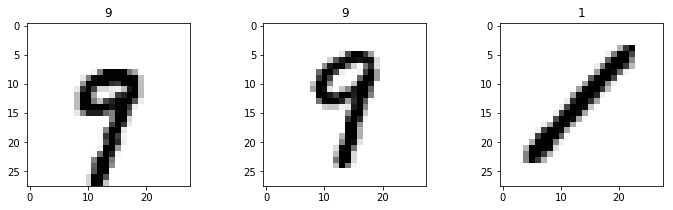

In [57]:
plt.figure(figsize=(12,3))

plt.subplot(131)
plt.title(y_train_upd[1001])
plt.imshow(X_train_upd[1001].reshape(28,28), cmap='binary')

plt.subplot(132)
plt.title(y_train_upd[100001])
plt.imshow(X_train_upd[100001].reshape(28, 28), cmap='binary')

plt.subplot(133)
plt.title(y_train_upd[50001])
plt.imshow(X_train_upd[50001].reshape(28,28), cmap='binary')

plt.axis("on")
plt.show()

In [17]:
len(X_train_upd), len(y_train_upd), X_train_upd.shape, y_train_upd.shape

(168000, 168000, (168000, 784), (168000,))

In [19]:
type(X_train_upd), type(X_train), type(y_train_upd), type(y_train)

(numpy.ndarray,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 pandas.core.series.Series)

### Concatenating augmented data to original training data

In [46]:
y_train_augmented = pd.concat([y_train, pd.Series(y_train_upd)], ignore_index=True)

In [47]:
X_train_augmented = pd.concat([X_train
                              , pd.DataFrame(data = X_train_upd, columns = X_train.columns)]
                              , ignore_index=True)

In [48]:
X_train_augmented.shape, y_train_augmented.shape

((201600, 784), (201600,))

In [49]:
X_train_augmented.sample(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [50]:
y_train_augmented.head()

0    2
1    9
2    2
3    1
4    5
dtype: int64

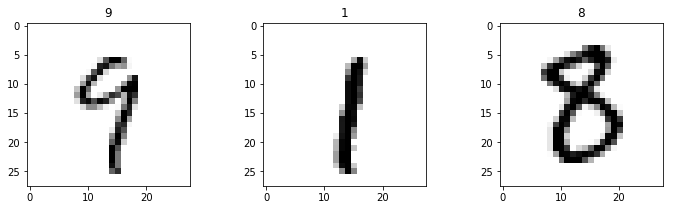

In [56]:
plt.figure(figsize=(12,3))

plt.subplot(131)
plt.title(y_train_augmented[549])
plt.imshow(X_train_augmented.iloc[549].values.reshape(28,28), cmap='binary')

plt.subplot(132)
plt.title(y_train_augmented[40572])
plt.imshow(X_train_augmented.iloc[40572].values.reshape(28,28), cmap='binary')

plt.subplot(133)
plt.title(y_train_augmented[199692])
plt.imshow(X_train_augmented.iloc[199692].values.reshape(28,28), cmap='binary')

plt.axis("on")
plt.show()

### Training the classifier

In [58]:
optimal_knn_classifier = KNeighborsClassifier(n_neighbors = 4
                                              , weights = 'distance'
                                              , algorithm = 'auto'
                                              , leaf_size=30
                                              , metric = 'minkowski'
                                              , n_jobs = -1
                                              , p = 2
                                              , metric_params = None)

In [60]:
optimal_knn_classifier.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [61]:
y_test_pred = optimal_knn_classifier.predict(X_test)

In [62]:
knn_conf_mx = confusion_matrix(y_test, y_test_pred)
knn_conf_mx

array([[785,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 949,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 833,   0,   0,   0,   0,   4,   0,   0],
       [  0,   0,   0, 857,   0,   1,   0,   0,   0,   0],
       [  0,   1,   0,   0, 787,   0,   0,   1,   0,   7],
       [  0,   0,   0,   1,   0, 798,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0, 869,   0,   0,   0],
       [  0,   3,   0,   0,   0,   0,   0, 857,   0,   0],
       [  0,   1,   0,   0,   0,   1,   0,   0, 812,   3],
       [  1,   0,   0,   0,   1,   0,   0,   3,   0, 822]])

In [63]:
accuracy_score(y_test, y_test_pred)

0.9963095238095238

In [65]:
recall_score(y_test, y_test_pred, average='weighted')

0.9963095238095238

In [66]:
precision_score(y_test, y_test_pred, average='weighted')

0.9963254539779379

### Creating a large mnist_train data and using the same for training and for final submission

In [67]:
X_augmented = pd.concat([X
                         , pd.DataFrame(data = X_train_upd, columns = X.columns)]
                        , ignore_index = True)

In [68]:
y_augmented = pd.concat([y, pd.Series(y_train_upd)]
                        , ignore_index = True)

In [69]:
X_augmented.shape, y_augmented.shape

((210000, 784), (210000,))

In [71]:
optimal_knn_classifier = KNeighborsClassifier(n_neighbors = 4
                                              , weights = 'distance'
                                              , n_jobs = -1
                                              , algorithm = 'auto'
                                              , leaf_size = 30
                                              , p=2
                                              , metric = 'minkowski'
                                              , metric_params = None)
optimal_knn_classifier.fit(X_augmented, y_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [72]:
mnist_test_pred = optimal_knn_classifier.predict(mnist_test)

In [73]:
mnist_test_pred.shape

(28000,)

In [77]:
mnist_submission = pd.DataFrame({"ImageId": range(1, len(mnist_test_pred)+1)
                                , "Label": mnist_test_pred})

In [78]:
mnist_submission.sample(10)

,ImageId,Label
24079,24080,5
26373,26374,2
18903,18904,7
14100,14101,4
27919,27920,4
9780,9781,0
8538,8539,8
20416,20417,0
23064,23065,5
15745,15746,2


In [79]:
mnist_submission.to_csv('mnist_submission.csv', index=False)